In [1]:
from scipy.stats import linregress
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
complete_df = pd.read_csv("full_data.csv")
complete_df.info()

complete_df = complete_df.loc[~complete_df.duplicated(subset=['County','State'])]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 23 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Unnamed: 0                                                                                    2851 non-null   int64  
 1   County                                                                                        2851 non-null   object 
 2   State                                                                                         2851 non-null   object 
 3   Total Population                                                                              2851 non-null   float64
 4   Land Area (m^2)                                                                               2851 non-null   float64
 5   Population Density (per m^2

In [3]:
pop_dense = complete_df['Population Density (per m^2)']
sq_mile = complete_df['Land Area (m^2)']

avg_income = complete_df['Income per capita']
gross_rent = complete_df['Median Gross Rent']

 

Text(0.5, 1.0, 'Population Density (person per m^2)')

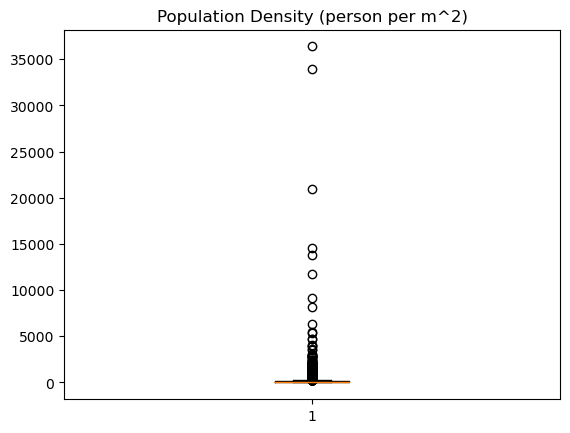

In [4]:
plt.boxplot(pop_dense)
plt.title("Population Density (person per m^2)")

(0.0, 400.0)

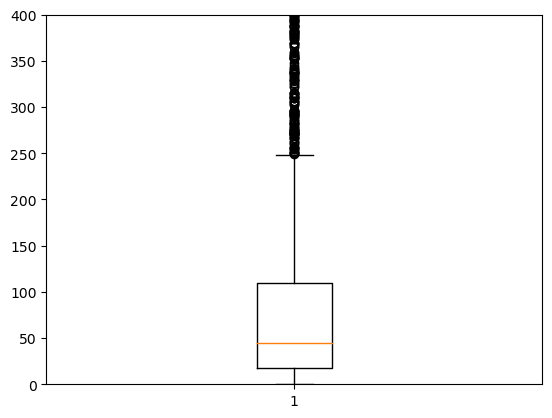

In [5]:
plt.boxplot(pop_dense)
plt.ylim(0,400)

In [6]:
len(complete_df.loc[complete_df['Population Density (per m^2)']>250])/len(complete_df['Population Density (per m^2)'])

0.1372618207480593

Determine cutoff for outliers based on IQR?

In [7]:
complete_df['Population Density (per m^2)'].describe()

count     2834.000000
mean       211.278574
std       1195.144933
min          0.203252
25%         17.223321
50%         44.545271
75%        109.970286
max      36384.792432
Name: Population Density (per m^2), dtype: float64

In [8]:
quartiles = complete_df['Population Density (per m^2)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The lower quartile is {lowerq}")
print(f"The upper quartile is {upperq}")
print(f'Values below {lower_bound} may be outliers')
print(f'Values above {upper_bound} may be outliers')

The lower quartile is 17.22332115416988
The upper quartile is 109.97028601127809
Values below -121.89712613149244 may be outliers
Values above 249.0907332969404 may be outliers


Parsing data into low pop density and high pop density groups

In [9]:
low_den_df = complete_df.loc[complete_df['Population Density (per m^2)']<upper_bound]
low_den_df.head()

,Unnamed: 0,County,State,Total Population,Land Area (m^2),Population Density (per m^2),Median Gross Rent,Income per capita,"Less Than A High School Diploma, 2017-21","High School Diploma Only, 2017-21",...,"Percent Of Adults With A High School Diploma Only, 2017-21","Percent Of Adults Completing Some College Or Associate'S Degree, 2017-21","Percent Of Adults With A Bachelor'S Degree Or Higher, 2017-21",Estimate Of People Of All Ages In Poverty 2020,Estimated Percent Of People Of All Ages In Poverty 2020,Employed_2020,Unemployed_2020,Unemployment_Rate_2020,Median_Household_Income_2020,"County Household Median Income As A Percent Of The State Total Median Household Income, 2020"
0,0,Autauga,Alabama,55639.0,594.44,93.599018,1011.0,29804.0,4126.0,12977.0,...,32.758621,28.694401,28.131469,6242.0,11.2,24985.0,1420.0,5.4,67565.0,125.217762
1,1,Baldwin,Alabama,218289.0,1589.78,137.307678,1032.0,33751.0,14555.0,44342.0,...,27.375492,31.188379,32.450286,20189.0,8.9,92751.0,6159.0,6.2,71135.0,131.834019
2,2,Barbour,Alabama,25026.0,884.88,28.281801,587.0,20074.0,4378.0,6600.0,...,36.676855,27.841067,11.153098,5548.0,25.5,8004.0,676.0,7.8,38866.0,72.030097
3,3,Bibb,Alabama,22374.0,622.58,35.937550,693.0,22626.0,3125.0,7052.0,...,43.918540,24.705736,11.913807,3549.0,17.8,8073.0,639.0,7.3,50907.0,94.345602
4,4,Blount,Alabama,57755.0,644.78,89.573188,666.0,25457.0,6650.0,14284.0,...,35.123439,33.621029,14.903610,7525.0,13.1,23973.0,1143.0,4.6,55203.0,102.307350


In [10]:
high_den_df = complete_df.loc[complete_df['Population Density (per m^2)']>upper_bound]
high_den_df.head()

,Unnamed: 0,County,State,Total Population,Land Area (m^2),Population Density (per m^2),Median Gross Rent,Income per capita,"Less Than A High School Diploma, 2017-21","High School Diploma Only, 2017-21",...,"Percent Of Adults With A High School Diploma Only, 2017-21","Percent Of Adults Completing Some College Or Associate'S Degree, 2017-21","Percent Of Adults With A Bachelor'S Degree Or Higher, 2017-21",Estimate Of People Of All Ages In Poverty 2020,Estimated Percent Of People Of All Ages In Poverty 2020,Employed_2020,Unemployed_2020,Unemployment_Rate_2020,Median_Household_Income_2020,"County Household Median Income As A Percent Of The State Total Median Household Income, 2020"
13,13,McCracken,Kentucky,65485.0,248.74,263.266865,744.0,30044.0,3582.0,15235.0,...,32.206579,33.517250,26.703873,9974.0,15.5,4485.0,337.0,7.0,31453.0,58.166587
26,26,Oldham,Kentucky,66508.0,187.22,355.239825,964.0,44186.0,2728.0,8888.0,...,19.787168,29.734182,44.405361,3143.0,5.0,4770.0,315.0,6.2,45177.0,83.546621
55,55,Anoka,Minnesota,353775.0,423.01,836.327746,1162.0,37804.0,14435.0,67611.0,...,27.433406,35.428780,31.280761,25261.0,7.1,17812.0,1225.0,6.4,60159.0,79.692406
61,61,Carver,Minnesota,103561.0,354.33,292.272740,1170.0,48492.0,2634.0,12397.0,...,17.912928,28.592483,49.688615,3731.0,3.5,13194.0,1357.0,9.3,52271.0,69.243201
66,66,Montgomery,Tennessee,204992.0,539.18,380.192144,972.0,28032.0,8634.0,36120.0,...,26.886203,36.821146,29.865867,22576.0,10.8,3421.0,192.0,5.3,64271.0,112.831361


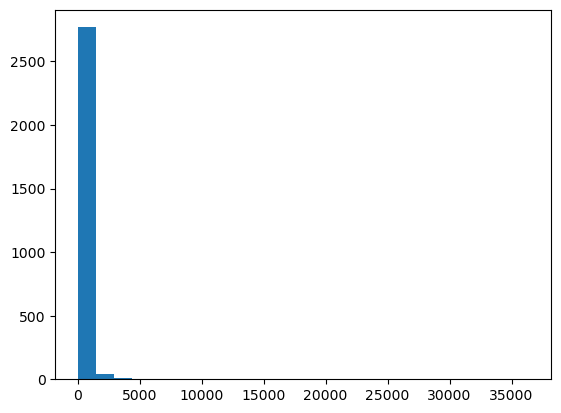

In [11]:
pop_histo = plt.hist(pop_dense, bins = 25)

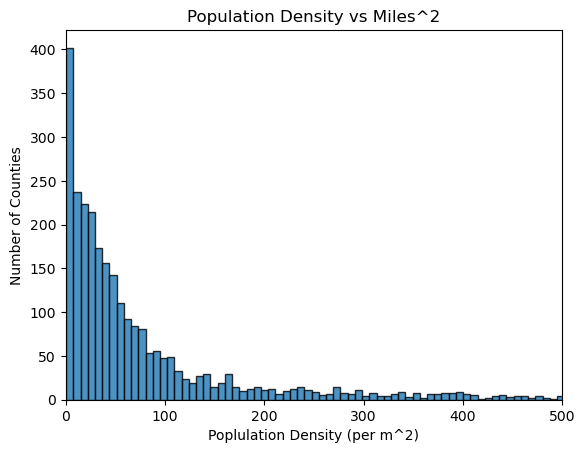

In [12]:
pop_histo = plt.hist(pop_dense, bins = 5000, alpha = .8, edgecolor = 'black')
plt.xlim(0,500)
plt.xlabel("Poplulation Density (per m^2)")
plt.ylabel("Number of Counties")
plt.title("Population Density vs Miles^2")

plt.savefig('outputs/densityhisto.png')

rvalue: -0.06756208340829313
p-value: 0.00031917832549529346


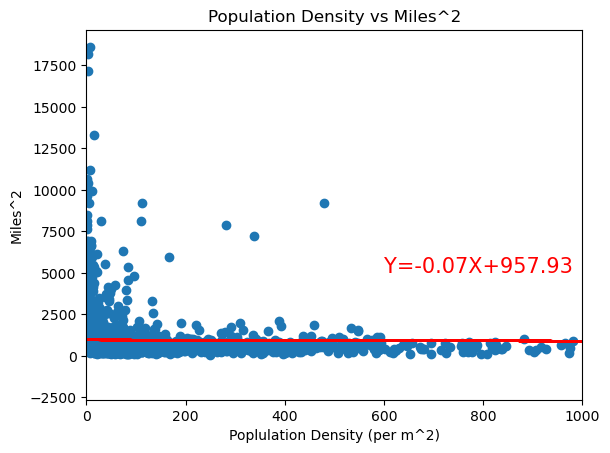

In [13]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(pop_dense,sq_mile)
regress_value = pop_dense * slope + intercept
line_eq = "Y=" + str(round(slope,2)) + "X+" + str(round(intercept, 2))
plt.plot(pop_dense, regress_value, "r-")
plt.annotate(line_eq,(600,5000), fontsize = 15, color = 'red')
plt.scatter(pop_dense,sq_mile)
plt.xlim(0,1000)
plt.xlabel("Poplulation Density (per m^2)")
plt.ylabel("Miles^2")
plt.title("Population Density vs Miles^2")
print(f"rvalue: {rvalue}")
print(f"p-value: {pvalue}")
plt.savefig('outputs/linreg_pop_vs_miles.png')

rvalue: 0.18321063739905155
p-value: 8.172353349826106e-23


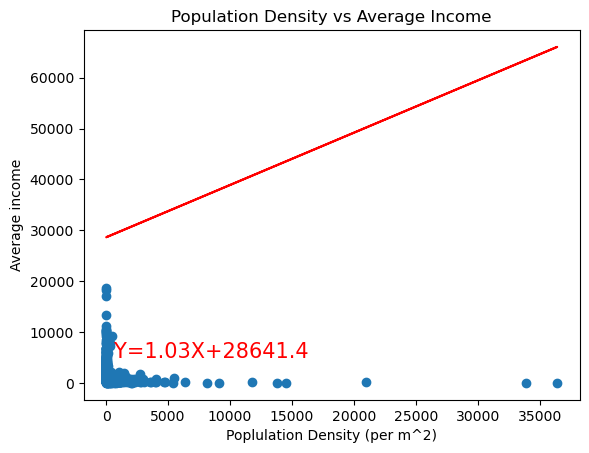

In [14]:

(slope, intercept, rvalue, pvalue, stderr) = linregress(pop_dense,avg_income)
regress_value = pop_dense * slope + intercept
line_eq = "Y=" + str(round(slope,2)) + "X+" + str(round(intercept, 2))
plt.plot(pop_dense, regress_value, "r-")
plt.annotate(line_eq,(600,5000), fontsize = 15, color = 'red')
plt.scatter(pop_dense,sq_mile)

plt.xlabel("Poplulation Density (per m^2)")
plt.ylabel("Average income")
plt.title("Population Density vs Average Income")

print(f"rvalue: {rvalue}")
print(f"p-value: {pvalue}")

rvalue: 0.31183965553911813
p-value: 5.864022477489176e-65


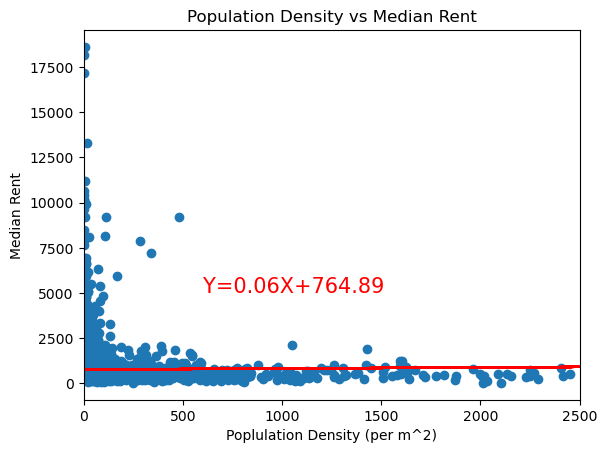

In [15]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(pop_dense,gross_rent)
regress_value = pop_dense * slope + intercept
line_eq = "Y=" + str(round(slope,2)) + "X+" + str(round(intercept, 2))
plt.plot(pop_dense, regress_value, "r-")
plt.annotate(line_eq,(600,5000), fontsize = 15, color = 'red')
plt.scatter(pop_dense,sq_mile)
plt.xlim(0,2500)
plt.xlabel("Poplulation Density (per m^2)")
plt.ylabel("Median Rent")
plt.title("Population Density vs Median Rent")
print(f"rvalue: {rvalue}")
print(f"p-value: {pvalue}")


Text(0.5, 1.0, 'Average income vs Median Rent')

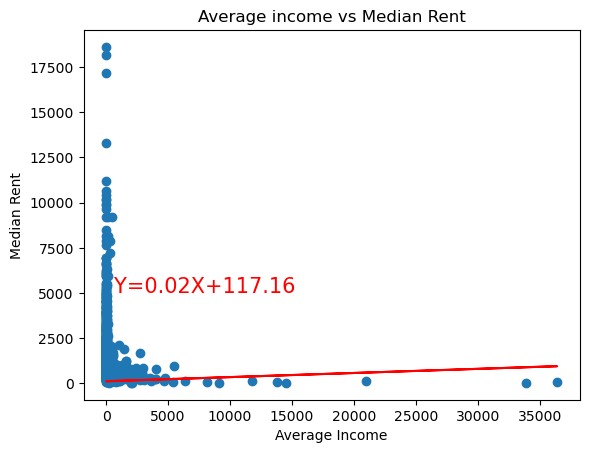

In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_income,gross_rent)
regress_value = pop_dense * slope + intercept
line_eq = "Y=" + str(round(slope,2)) + "X+" + str(round(intercept, 2))
plt.plot(pop_dense, regress_value, "r-")
plt.annotate(line_eq,(600,5000), fontsize = 15, color = 'red')
plt.scatter(pop_dense,sq_mile)
plt.xlabel("Average Income")
plt.ylabel("Median Rent")
plt.title("Average income vs Median Rent")

# Population Density Analyses

In [17]:
low_den_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2443 entries, 0 to 2850
Data columns (total 23 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Unnamed: 0                                                                                    2443 non-null   int64  
 1   County                                                                                        2443 non-null   object 
 2   State                                                                                         2443 non-null   object 
 3   Total Population                                                                              2443 non-null   float64
 4   Land Area (m^2)                                                                               2443 non-null   float64
 5   Population Density (per m^2

## Low - 'Histogram of Population Density (O/Ma)

## High - Histogram of Population Density (O)

## Low - Population Density vs. Land Area $m^2$ (Morgen)

Text(0.5, 1.0, 'Population Density (per m^2)')

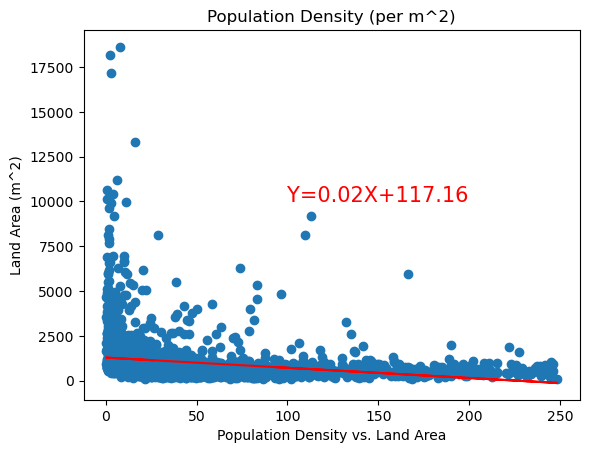

In [24]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(low_den_df["Population Density (per m^2)"],
                                                        low_den_df["Land Area (m^2)"])
regress_value = slope * low_den_df["Population Density (per m^2)"] + intercept

plt.scatter(low_den_df["Population Density (per m^2)"], low_den_df["Land Area (m^2)"])
plt.plot(low_den_df["Population Density (per m^2)"], regress_value, "r-")
plt.annotate(line_eq,(100,10000), fontsize = 15, color = 'red')
plt.xlabel("Population Density vs. Land Area")
plt.ylabel("Land Area (m^2)")
plt.title("Population Density (per m^2)")

## High - Population Density vs. Land Area $m^2$ (Morgen)

Text(0.5, 1.0, 'Population Density (per m^2)')

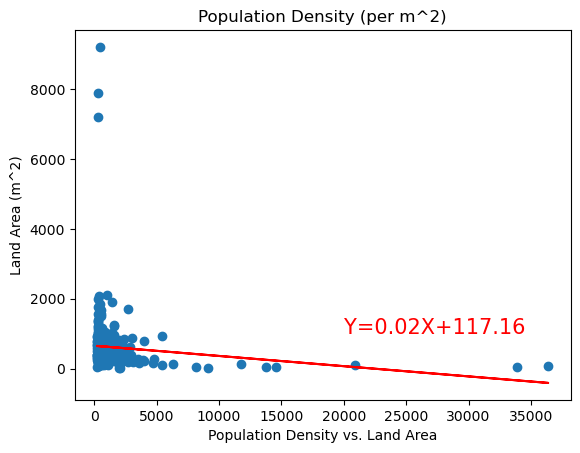

In [27]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(high_den_df["Population Density (per m^2)"],
                                                        high_den_df["Land Area (m^2)"])
regress_value = slope * high_den_df["Population Density (per m^2)"] + intercept

plt.scatter(high_den_df["Population Density (per m^2)"], high_den_df["Land Area (m^2)"])
plt.plot(high_den_df["Population Density (per m^2)"], regress_value, "r-")
plt.annotate(line_eq,(20000,1000), fontsize = 15, color = 'red')
plt.xlabel("Population Density vs. Land Area")
plt.ylabel("Land Area (m^2)")
plt.title("Population Density (per m^2)")

## Low - Population Density vs. Median Gross Rent (Ryan)

## High - Population Density vs. Median Gross Rent (Ryan)

## Education Visualizations

### Low - Population Density vs. Education things (Gina)

### High - Population Density vs. Education things (Gina)

### Low - Education vs. Median Household Income (Ryan)

### High - Education vs. Median Household Income (Ryan)

## Population Density vs. Income Stuff

### Low - Population Density vs. Median_household_income (O)

### High - Population Density vs. Median_household_income (O)

### Low - Population Density vs. Income per capita (Mark)

### High - Population Density vs. Income per capita (Mark)